In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [160]:
port_train_df = pd.read_csv('train.csv')
port_test_df = pd.read_csv('test.csv')

Few  firts steps   in analysing the data 
1. take overview of data by knowing column names,types ,
2. get the dimension of the data
3. do univariate analysis ,get the mean median /spread of the data 
4. Bivariate analysis do some anaylysis on relation ship between two variable 
   for continous and continous scatter plot or heatmap kind of thing
   for continous -continous -stack chart
   check about possiblility of Chi-Square Test
5. analyse the data
6. check missing value ,missing value treatment .
7. check outliers if present 
8. check the skewness of the data ,negative skewd or positive skewed ,use log transformation for that
9. Identify if any ordinal number are there and convert accordingly 
https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables
link to handle categorical variable

   
   

In [130]:
#check the types of columns of train data 
print "Train data Types column \n" 
port_train_df.dtypes



Train data Types column 



portfolio_id       object
desk_id            object
office_id          object
pf_category        object
start_date          int64
sold              float64
country_code       object
euribor_rate      float64
currency           object
libor_rate        float64
bought            float64
creation_date       int64
indicator_code     object
sell_date           int64
type               object
hedge_value        object
status             object
return            float64
dtype: object

In [131]:
print "Test data Types column \n" 
port_test_df.dtypes

Test data Types column 



portfolio_id       object
desk_id            object
office_id          object
pf_category        object
start_date          int64
sold              float64
country_code       object
euribor_rate      float64
currency           object
libor_rate        float64
bought            float64
creation_date       int64
indicator_code     object
sell_date           int64
type               object
hedge_value        object
status             object
dtype: object

In [132]:
# return is the target types here 
# libor rate:short term rate 
# eubrior: interest 
# hedge value : fair value


In [133]:
#check the dimension of the train data 
print "Rows of train data ; {}, Column of train data :{}".format(port_train_df.shape[0],port_train_df.shape[1])

Rows of train data ; 9366, Column of train data :18


In [134]:
#check the dimension of the train data 
print "Rows of test data ; {}, Column of test data :{}".format(port_test_df.shape[0],port_test_df.shape[1])

Rows of test data ; 4801, Column of test data :17


In [135]:
port_train_df.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496


In [136]:
# here  spread of the data we are more intertested in pf_category,sold,country Code ,eurinor rate,currency,libor_rate,
#bought,
port_train_df.describe(include='all')

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
count,9366,5701,9366,9366,9.366000e+03,9.364000e+03,9366,9366.000000,9366,8892.000000,9.364000e+03,9.366000e+03,3667,9.366000e+03,9366,3665,6282,9366.000000
unique,9366,3992,2,5,NaN,NaN,5,NaN,5,NaN,NaN,NaN,1,NaN,8,2,1,NaN
top,PF00003536,DSK00006011,OFF00001002,C,NaN,NaN,M,NaN,CHF,NaN,NaN,NaN,True,NaN,E,False,True,NaN
freq,1,10,6458,5260,NaN,NaN,5307,NaN,5307,NaN,NaN,NaN,3667,NaN,5734,2437,6282,NaN
mean,NaN,NaN,NaN,NaN,2.011706e+07,1.019740e+08,NaN,0.009383,NaN,0.998066,1.018914e+08,2.011706e+07,NaN,2.011770e+07,NaN,NaN,NaN,0.014100
std,NaN,NaN,NaN,NaN,3.052996e+04,1.928066e+08,NaN,0.013298,NaN,1.457977,1.927472e+08,3.052372e+04,NaN,3.060900e+04,NaN,NaN,NaN,0.020549
min,NaN,NaN,NaN,NaN,2.004041e+07,1.100000e+00,NaN,-0.003740,NaN,-0.667095,1.099698e+00,2.004072e+07,NaN,2.004071e+07,NaN,NaN,NaN,-0.009600
25%,NaN,NaN,NaN,NaN,2.010020e+07,2.763200e+07,NaN,0.000980,NaN,0.244490,2.761285e+07,2.010020e+07,NaN,2.010023e+07,NaN,NaN,NaN,0.003000
50%,NaN,NaN,NaN,NaN,2.011120e+07,5.517050e+07,NaN,0.004390,NaN,0.531983,5.512056e+07,2.011120e+07,NaN,2.011121e+07,NaN,NaN,NaN,0.005400
75%,NaN,NaN,NaN,NaN,2.014071e+07,1.144632e+08,NaN,0.013510,NaN,1.109959,1.144459e+08,2.014071e+07,NaN,2.014083e+07,NaN,NaN,NaN,0.014520


Analysis from Above
1. portfolid id is unique no repetation here
2. Desk id has many missing value 
3. looks like two are there from where port folio is getting generated
4. pf category is C is very popular more than half C is he category m 
5. Country code M is very frequent 
6. Currency is CHF
7. type is E not sure what it indicates 
8. euribor_rate every where it is present but libor_rate is missing most of the places 
9. Indicator code hedge _value status is missing value 
10. need to check if ordinal value is there safer to use ordinal value encoder

In [137]:
#check the missing value if present 
port_train_df.isnull().sum()


portfolio_id         0
desk_id           3665
office_id            0
pf_category          0
start_date           0
sold                 2
country_code         0
euribor_rate         0
currency             0
libor_rate         474
bought               2
creation_date        0
indicator_code    5699
sell_date            0
type                 0
hedge_value       5701
status            3084
return               0
dtype: int64

In [138]:
port_test_df.isnull().sum()

portfolio_id         0
desk_id           1948
office_id            0
pf_category          0
start_date           0
sold                 0
country_code         0
euribor_rate         0
currency             0
libor_rate         265
bought               0
creation_date        0
indicator_code    2851
sell_date            0
type                 0
hedge_value       2851
status            1457
dtype: int64

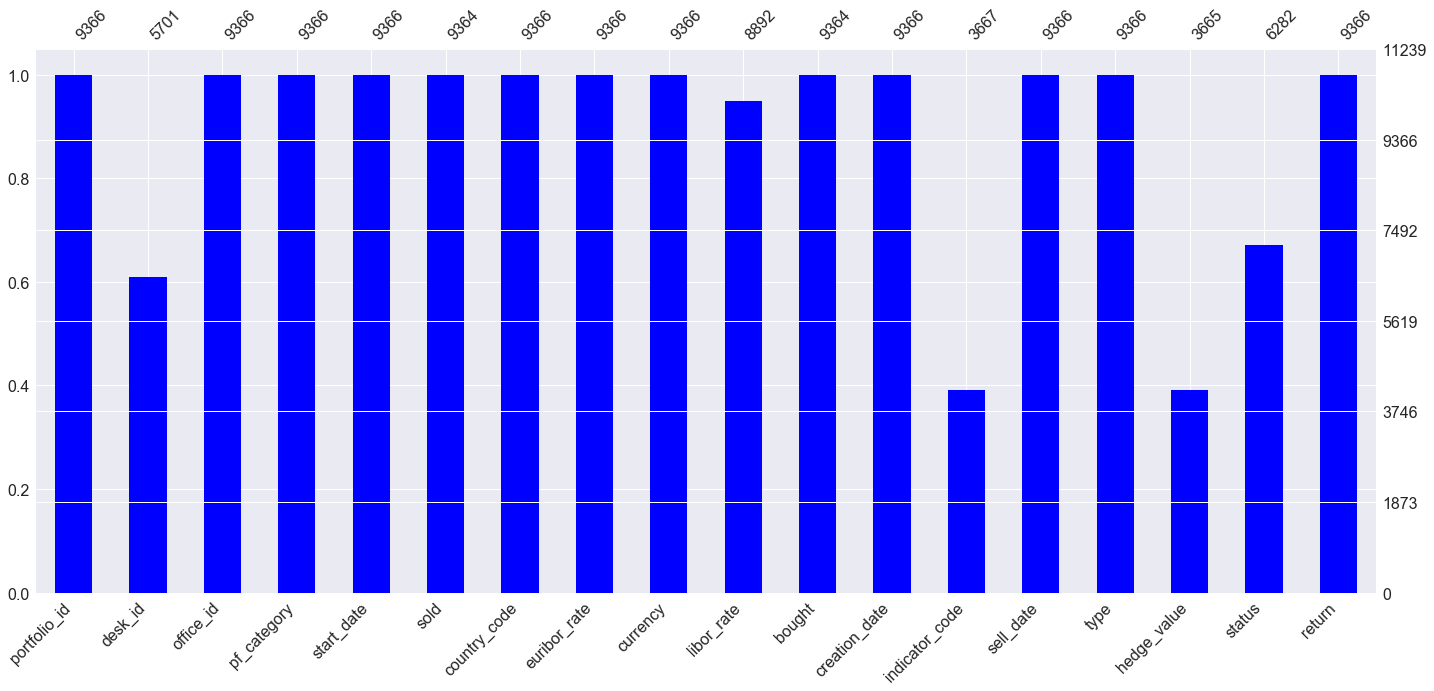

In [139]:
#visulaize the same using the missingno 
import missingno as msno
msno.bar(port_train_df,color='blue')

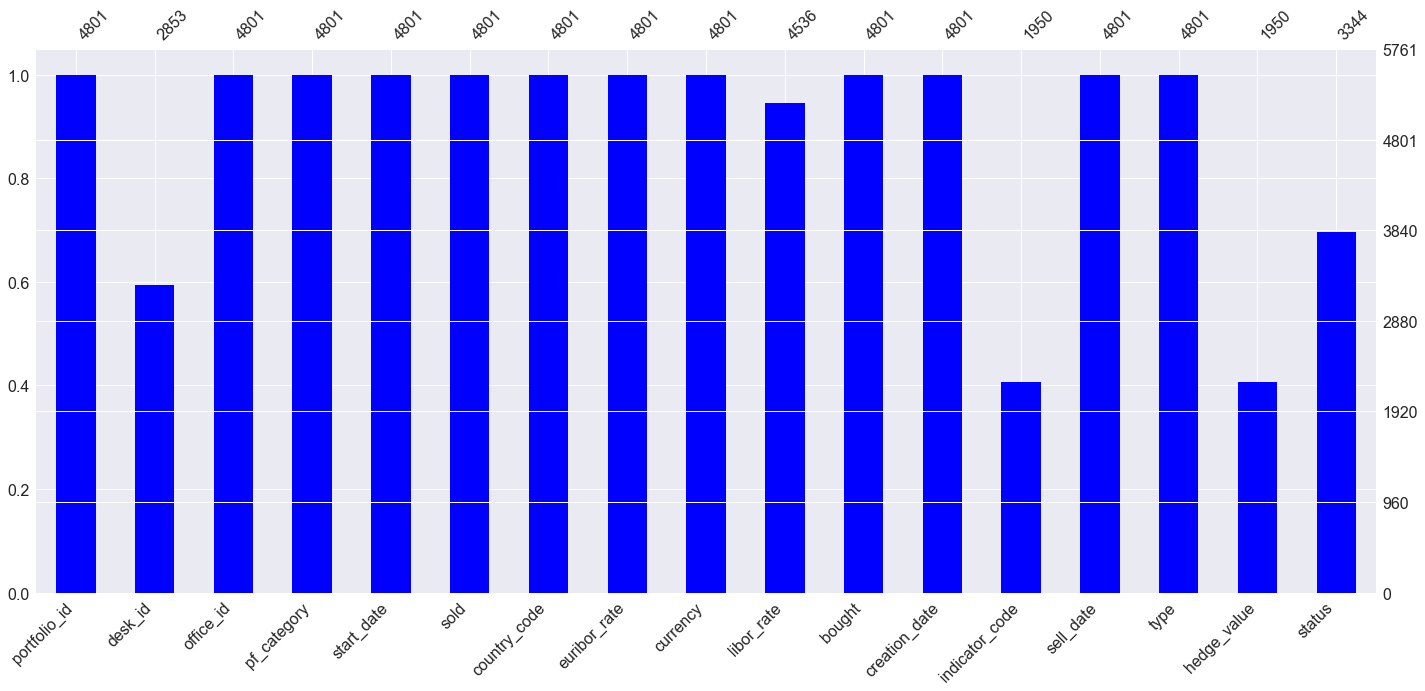

In [140]:
#missing number for test_df
msno.bar(port_test_df,color='blue')

In [184]:
#concate all the data train and test so that need not to do all the 

all_data = pd.concat((port_train_df.loc[:,'portfolio_id':'status'],
                      port_test_df.loc[:,'portfolio_id':'status']))

In [185]:
#from here all the conversion and other feature engineering will be done on whole data 

In [186]:
#since date here is integer data type  will convert it into string and then datetime format
 #s="{0:-08d}".format(i)
    
#first convert into the dateTimeFormat
#parameter  If 'coerce', then invalid parsing will be set as NaN
from datetime import datetime

all_data['start_date']=all_data['start_date'].apply(lambda x: "{0:-08d}".format(x))

all_data['start_date']=all_data['start_date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))


In [187]:

all_data['sell_date']=all_data['sell_date'].apply(lambda x: "{0:-08d}".format(x))
all_data['sell_date']=all_data['sell_date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))

In [188]:
#creation date

all_data['creation_date']=all_data['creation_date'].apply(lambda x: "{0:-08d}".format(x))
all_data['creation_date']=all_data['creation_date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))

In [189]:
#convert sold into log 

In [190]:
#just to verify the all data types 
all_data.dtypes

portfolio_id              object
desk_id                   object
office_id                 object
pf_category               object
start_date        datetime64[ns]
sold                     float64
country_code              object
euribor_rate             float64
currency                  object
libor_rate               float64
bought                   float64
creation_date     datetime64[ns]
indicator_code            object
sell_date         datetime64[ns]
type                      object
hedge_value               object
status                    object
dtype: object

In [191]:
#check the skewness of numeriacal columns
from scipy.stats import skew
#get all the columns with numeric data types
numeric_feats =all_data.dtypes[(all_data.dtypes!='object') & (all_data.dtypes!='datetime64[ns]')].index

print numeric_feats

Index([u'sold', u'euribor_rate', u'libor_rate', u'bought'], dtype='object')


In [192]:
#For normally distributed data, the skewness should be about 0. A skewness value > 0 means
#that there is more weight in the left tail of the distribution. The function skewtest can be used to determine
#if the skewness value is close enough to 0, statistically speaking.
#before it change it into log as sold  and bought 
port_train_df["sold"] = np.log1p(port_train_df["sold"])
port_train_df["bought"]=np.log1p(port_train_df["bought"])
skewed_feats = port_train_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

In [193]:
skewed_feats

sold           -4.774069
euribor_rate    1.626369
libor_rate      1.695345
bought         -4.778083
dtype: float64

In [194]:
#distribution is highly skewed looks like right skew need to work on it 
#
all_data[numeric_feats] = np.log1p(all_data[numeric_feats])

#Since most of the data is categorical we will assign as encoder 

pf_category        object
start_date          int64
sold              float64
country_code       object
euribor_rate      float64
currency           object
libor_rate        float64
bought            float64
creation_date       int64
indicator_code     object
sell_date           int64
type               object
hedge_value        object
status             object




In [172]:
#fisrt do with the label encoder later check with the ordinal value 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [195]:
objcolname=['pf_category','currency','type','country_code']
for col in objcolname:
    all_data[col]=le.fit_transform(all_data[col])
    
    


In [197]:
all_data.head(10)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001002,DSK00001001,OFF00001002,1,2004-07-20,2.971234,2,0.020528,4,1.203638,2.971145,2004-07-20,NaN,2004-08-12,1,NaN,NaN
1,PF00001003,DSK00001002,OFF00001001,0,2004-07-09,2.995222,1,0.020528,2,1.835715,2.995034,2004-07-23,NaN,2004-08-12,2,NaN,NaN
2,PF00001005,DSK00001004,OFF00001001,0,2004-07-23,2.936475,2,0.020528,4,1.203638,2.936386,2004-07-23,NaN,2004-08-17,0,NaN,NaN
3,PF00001006,DSK00001005,OFF00001001,0,2004-06-09,2.991740,2,0.020528,4,1.203638,2.991648,2004-07-23,NaN,2004-07-13,0,NaN,NaN
4,PF00001007,DSK00001005,OFF00001002,1,2004-06-09,2.983804,2,0.020528,4,1.203638,2.983710,2004-07-23,NaN,2004-07-13,1,NaN,NaN
5,PF00001008,DSK00001006,OFF00001001,0,2004-07-07,2.928632,2,0.020528,4,1.203638,2.928534,2004-07-26,NaN,2004-08-10,0,NaN,NaN
6,PF00001010,DSK00001009,OFF00001001,0,2004-07-06,2.940204,2,0.020528,4,1.203638,2.940106,2004-07-26,NaN,2004-08-09,0,NaN,NaN
7,PF00001011,DSK00001009,OFF00001002,1,2004-07-06,2.981372,2,0.020528,4,1.203638,2.981278,2004-07-26,NaN,2004-08-09,1,NaN,NaN
8,PF00001012,DSK00001010,OFF00001001,0,2004-04-19,2.956653,2,0.020528,4,1.203638,2.956387,2004-07-26,NaN,2004-07-20,0,NaN,NaN
9,PF00001016,DSK00001014,OFF00001001,0,2004-04-14,3.004411,2,0.020528,4,1.203638,3.004163,2004-07-27,NaN,2004-07-13,0,NaN,NaN


In [198]:
#just to verify
all_data.isnull().sum()

portfolio_id         0
desk_id           5613
office_id            0
pf_category          0
start_date           0
sold                 2
country_code         0
euribor_rate         0
currency             0
libor_rate         739
bought               2
creation_date        0
indicator_code    8550
sell_date            0
type                 0
hedge_value       8552
status            4541
dtype: int64

In [199]:

#fill the missing value for libor_rate with median
#inplace=True is passed, the data is renamed in place (it returns nothing) else it will create the copy of the column
all_data["libor_rate"]=all_data["libor_rate"].fillna(all_data["libor_rate"].median())

#fill status missing value
all_data["status"]=all_data["status"].fillna(all_data["status"].median())

#fill missing value for indicator code
all_data["indicator_code"]=all_data["indicator_code"].fillna(all_data["indicator_code"].median())

#fill missing value for bought
all_data["bought"]=all_data["bought"].fillna(all_data["bought"].median())

all_data["hedge_value"]=all_data["hedge_value"].fillna(all_data["hedge_value"].median())

In [201]:
all_data["sold"].fillna(all_data["sold"].median(), inplace=True)

In [200]:
#while hedge_value,status,indicator_code are boolean to directly make it as int
all_data['hedge_value']=all_data.hedge_value.astype(int)
all_data['indicator_code']=all_data.indicator_code.astype(int)
all_data['status']=all_data.status.astype(int)

In [202]:

all_data.dtypes

portfolio_id              object
desk_id                   object
office_id                 object
pf_category                int64
start_date        datetime64[ns]
sold                     float64
country_code               int64
euribor_rate             float64
currency                   int64
libor_rate               float64
bought                   float64
creation_date     datetime64[ns]
indicator_code             int32
sell_date         datetime64[ns]
type                       int64
hedge_value                int32
status                     int32
dtype: object

In [203]:
all_data.shape

(14167, 17)

#### Feature Engineering 
create new column for duration 
find outliers
As of now i will try to find out the duration with startdate and sell data 


In [205]:
#verify once the 
all_data.head(2)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001002,DSK00001001,OFF00001002,1,2004-07-20,2.971234,2,0.020528,4,1.203638,2.971145,2004-07-20,1,2004-08-12,1,0,1
1,PF00001003,DSK00001002,OFF00001001,0,2004-07-09,2.995222,1,0.020528,2,1.835715,2.995034,2004-07-23,1,2004-08-12,2,0,1


In [181]:
#check now the data types
all_data.dtypes

portfolio_id              object
desk_id                   object
office_id                 object
pf_category                int64
start_date        datetime64[ns]
sold                     float64
country_code               int64
euribor_rate             float64
currency                   int64
libor_rate               float64
bought                   float64
creation_date     datetime64[ns]
indicator_code            object
sell_date         datetime64[ns]
type                       int64
hedge_value                int64
status                     int64
dtype: object

In [222]:
#since all the data has been converted into datetime now we can calculate the duration

all_data['duration']=all_data['sell_date']-all_data['start_date']


In [224]:
all_data['duration_day']=all_data['duration'].apply(lambda x: x.days)

In [225]:
all_data['duration_day'].dtype

dtype('int64')

#### since following activity done
1. Encoding the data 
2. missing value
3. date data type conversion
4. calculation of duration

so now here on going to create the new data frame ignoring all the id as it does not affects the return value



In [227]:
#create the train data 

#creating matrices for sklearn:
X_train = all_data[:port_train_df.shape[0]]

In [228]:
X_train.isnull().sum()

portfolio_id         0
desk_id           3665
office_id            0
pf_category          0
start_date           0
sold                 0
country_code         0
euribor_rate         0
currency             0
libor_rate           0
bought               0
creation_date        0
indicator_code       0
sell_date            0
type                 0
hedge_value          0
status               0
duration             0
duration_day         0
dtype: int64

In [280]:
X_test=all_data[:port_test_df.shape[0]]

In [281]:
X_test.dtypes

portfolio_id               object
desk_id                    object
office_id                  object
pf_category                 int64
start_date         datetime64[ns]
sold                      float64
country_code                int64
euribor_rate              float64
currency                    int64
libor_rate                float64
bought                    float64
creation_date      datetime64[ns]
indicator_code              int32
sell_date          datetime64[ns]
type                        int64
hedge_value                 int32
status                      int32
duration          timedelta64[ns]
duration_day                int64
dtype: object

In [230]:
y_train=port_train_df[['return']]

In [231]:
y_train.head(2)

,return
0,0.02496
1,0.05496


In [232]:
X_train=X_train[['pf_category','sold','country_code','euribor_rate','currency','libor_rate','bought','indicator_code','type','hedge_value','status','duration_day']]

In [233]:
X_train.dtypes

pf_category         int64
sold              float64
country_code        int64
euribor_rate      float64
currency            int64
libor_rate        float64
bought            float64
indicator_code      int32
type                int64
hedge_value         int32
status              int32
duration_day        int64
dtype: object

In [234]:
#Apply Ridge Regression 
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [240]:
#calculate mean squared error 
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [236]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

In [237]:
from sklearn.model_selection import KFold

cv = KFold(5)
ridgecv = RidgeCV(alphas=alphas, cv=cv)

In [238]:
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],
    cv=KFold(n_splits=5, random_state=None, shuffle=False),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [241]:
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [244]:
import matplotlib.pyplot as plt
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

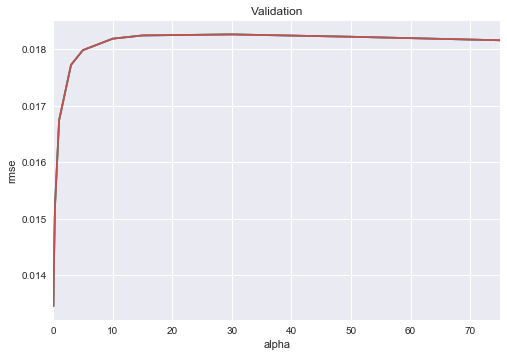

In [245]:
plt.show()

In [249]:
cv_ridge.min()

0.013449474172021293

In [247]:
###########  LASSO CV  
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)#taking alpha small as for small value for alpha also it tends to become zero 


C:\Users\Ravi\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [250]:
rmse_cv(model_lasso).mean()

0.022676843488458394

In [251]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [252]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 8 variables


In [253]:
#One thing to note here however is that the features selected are not necessarily the "correct" ones - especially since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on boostrapped samples and see how stable the feature selection is.
#todo

In [254]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

In [256]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

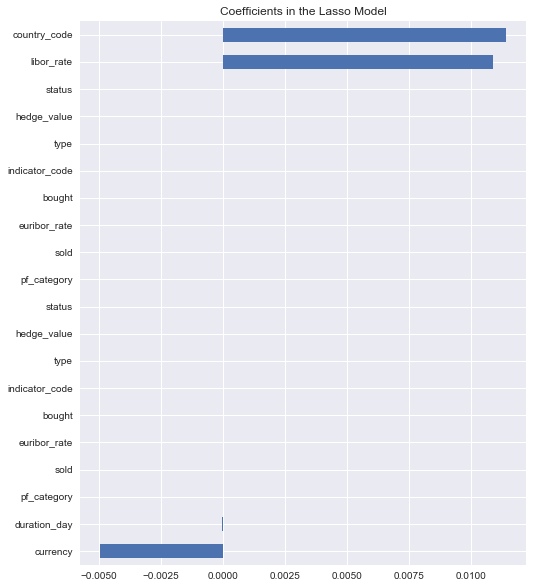

In [258]:
plt.show()

In [268]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})


In [269]:
y_train.head(10)

,return
0,0.02496
1,0.05496
2,0.02496
3,0.02496
4,0.02496
5,0.02490
6,0.02493
7,0.02493
8,0.02460
9,0.02466


In [272]:
model_lasso.predict(X_train).shape

(9366L,)

In [270]:
preds["residuals"] = model_lasso.predict(X_train) - y_train
preds.plot(x = "preds", y = "residuals",kind = "scatter")

ValueError: Shape of passed values is (9366, 9366), indices imply (1, 9366)

In [273]:
##Elastic Net 
from sklearn.linear_model import ElasticNetCV

In [274]:
Elastic_net_model = ElasticNetCV(cv=5, random_state=0)

In [276]:
Elastic_net_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [277]:
rmse_cv(Elastic_net_model).mean()

0.016065633667859174

In [282]:
X_test=X_test[['pf_category','sold','country_code','euribor_rate','currency','libor_rate','bought','indicator_code','type','hedge_value','status','duration_day']]

In [284]:
###using ElasticNet 
print 'generating file'
y_test_pred = Elastic_net_model.predict(X_test)
submission = pd.DataFrame({"portfolio_id": port_test_df["portfolio_id"],"return": y_test_pred})
submission.loc[submission['return'] <= 0, 'return'] = 0
fileName = "submission.csv"
submission.to_csv(fileName, index=False)

generating file
